# Ayudantía 1 - Repaso Algebra
## Etienne Rojas

Ante cualquier duda o posible corrección, por favor mandar un correo a `etienne.rojas@sansano.usm.cl` 

---

# 1. El Determinante

**Definición:**
$$
det(A) = \sum_{j=1}^{n} (-1)^{j+1} a_{1j} det(A_{1j})
$$

# Ejercicio 1: El Significado del Determinante

Dada la matriz:
$$
A =
\begin{bmatrix}
3 & 0 \\
0 & 2
\end{bmatrix}
$$

1) Calcular su determinante.
2) Calcular el area que forman los vectores canonicos $\mathbb{R}^2$ $i$ y $j$.
3) Multiplicar $Ai$ y $Aj$
4) Calcular el área que forman los nuevos vectores.
5) Saca alguna conclusión de este procedimiento?

Dada la matriz B:
$$
B =
\begin{bmatrix}
0.3\bar{3} & 0 \\
0 & 0.5
\end{bmatrix}
$$

1) Calcular su determinante.
1) Calcular el area que forman los vectores $\mathbb{R}^2$ $BAi$ y $BAj$.
1) Saca alguna conclusión de este procedimiento?

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
A = np.array([[3, 0], [0, 2]])
i = np.array([[1, 0]])
j = np.array([[0, 1]])
print("Matriz A:")
print(A)
print("Vector i:")
print(i)
print("Vector j:")
print(j)
A_inv = np.linalg.inv(A)
print("Matriz A inversa:")
print(A_inv)
print("Producto de A por i:")
print(A @i.T)
print("Producto de BAi:")
print(A_inv @ A @ i.T)



Matriz A:
[[3 0]
 [0 2]]
Vector i:
[[1 0]]
Vector j:
[[0 1]]
Matriz A inversa:
[[0.33333333 0.        ]
 [0.         0.5       ]]
Producto de A por i:
[[3]
 [0]]
Producto de BAi:
[[1.]
 [0.]]


Ahora repita el procedimiento para la matriz:
$$
A =
\begin{bmatrix}
4 & 2 \\
0 & 0
\end{bmatrix}
$$

1) Calcular su determinante.
2) Calcular el area que forman los vectores canonicos $\mathbb{R}^2$ $i$ y $j$.
3) Multiplicar $Ai$ y $Aj$
4) Calcular el área que forman los nuevos vectores.
5) Porqué si $det(0)=0$ la matriz no tiene inversa?

In [4]:
A = np.array([[4, 0], [2, 0]])
A_inv = np.linalg.inv(A)
print("Matriz A inversa:")
print(A_inv)

LinAlgError: Singular matrix

Gráficamente podemos ver una malla de puntos en el espacio como vectores

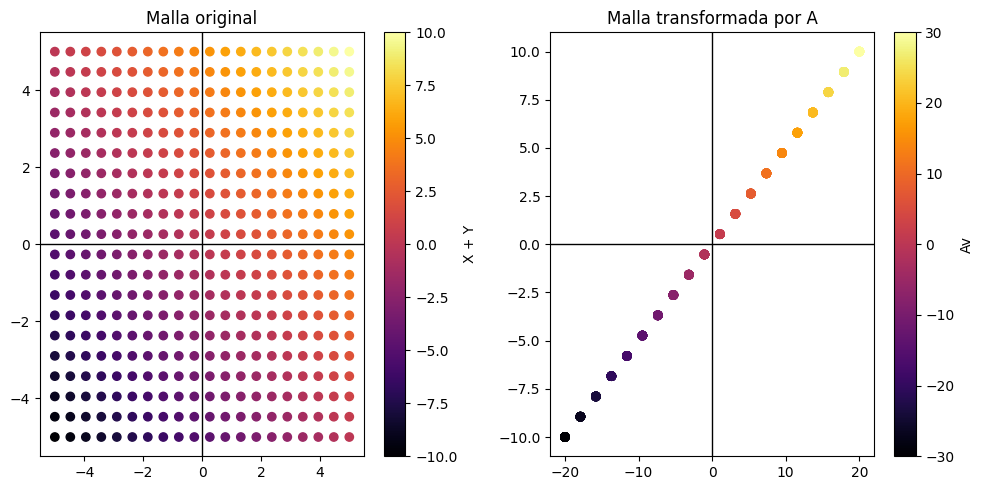

In [5]:
A = np.array([[4, 0],
              [2, 0]])

n_points = 20
x = np.linspace(-5, 5, n_points)
y = np.linspace(-5, 5, n_points)
X, Y = np.meshgrid(x, y)


points = np.vstack([X.ravel(), Y.ravel()])
transformed_points = A @ points
X2 = transformed_points[0].reshape(X.shape)
Y2 = transformed_points[1].reshape(Y.shape)

Z = X + Y
Z2 = X2 + Y2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# MALLA DE PUNTOS
sc1 = ax1.scatter(X.ravel(), Y.ravel(), c=Z.ravel(), cmap='inferno')
ax1.axhline(0, color='black', linewidth=1)
ax1.axvline(0, color='black', linewidth=1)
ax1.set_title('Malla original')
fig.colorbar(sc1, ax=ax1, label='X + Y')

# TRANSFORMACIÓN LINEAL
sc2 = ax2.scatter(X2.ravel(), Y2.ravel(), c=Z2.ravel(), cmap='inferno')
ax2.axhline(0, color='black', linewidth=1)
ax2.axvline(0, color='black', linewidth=1)
ax2.set_title('Malla transformada por A')
fig.colorbar(sc2, ax=ax2, label='Av')

plt.tight_layout()
plt.show()


---

# Ejercicio 2: Prototipo de PageRank

<div style="text-align: center;">
    <img src="../Assets/pageRank.png" width="600">
</div>

Tenemos un grafo donde cada nodo representa una página web y las conexiones $ij$ entre los nodos representan que se puede ir desde la página $i$ a la página $j$. Nos interesa encontrar un vector que represente la importancia de las páginas. 

## 1. Obtenga la matriz de adyacencia y matriz de transición
donde la matriz de adyacencia es:
$$
     M_{ij} = 
     \begin{cases}
       1 & \text{si la página } i \text{ enlaza a } j, \\
       0 & \text{en otro caso}.
     \end{cases}
$$
En la matriz de transición $T$ se construye a partir de la matriz A, pero haciendo que los valores de sus filas sumen 1. Esta matriz representa la probabilidad de que un usuario pase desde la página $i$ a la $j$. 

$$
     T_{ij} \;=\; \frac{M_{ij}}{\sum_{k} M_{ik}}.

$$

## 2. Estado Estacionario
La idea es que, dado un vector inicial de importancia $\mathbf{v}$ (por ejemplo, una distribución inicial de usuarios en las páginas), en cada “paso” se realice:
$$
  \mathbf{v}_{\text{nuevo}} = \mathbf{T} \cdot \mathbf{v}.
$$

- Tras suficientes iteraciones, el sistema debe estabilizarse en un **estado estacionario** $\mathbf{v}^*$ que satisfaga:
  $$
    \mathbf{T} \cdot \mathbf{v}^* = \mathbf{v}^*.
  $$
- Matemáticamente, esto significa que $\mathbf{v}^*$ es un **vector propio** de la matriz $\mathbf{T}$ asociado al **autovalor** $\lambda = 1$.
- Para interpretarlo como una *probabilidad* (o importancia relativa), **normalizamos** $\mathbf{v}^*$ de manera que la suma de sus componentes sea 1. De este modo, la componente $v_i^*$ indica la fracción de “importancia” o probabilidad asignada a la página $i$.


## 3. ¿Cuál es la página más importante?

---

In [6]:
T = np.array([[0, 1/2, 1/2],
              [0, 0, 1],
              [1, 0, 0]])

eigenvalues, eigenvectors = np.linalg.eig(T)
index = np.where(np.isclose(eigenvalues, 1))[0][0]
eigenvector_original = eigenvectors[:, index]
eigenvector_norm = eigenvector_original / np.sum(eigenvector_original)

eigenvector_norm

array([0.33333333+0.j, 0.33333333+0.j, 0.33333333+0.j])

In [7]:
v1 = np.array([1, 1, 1])
v2 = np.array([3, 3, 3])
result_v1 = T @ v1
result_v2 = T @ v2
result_v1, result_v2

(array([1., 1., 1.]), array([3., 3., 3.]))

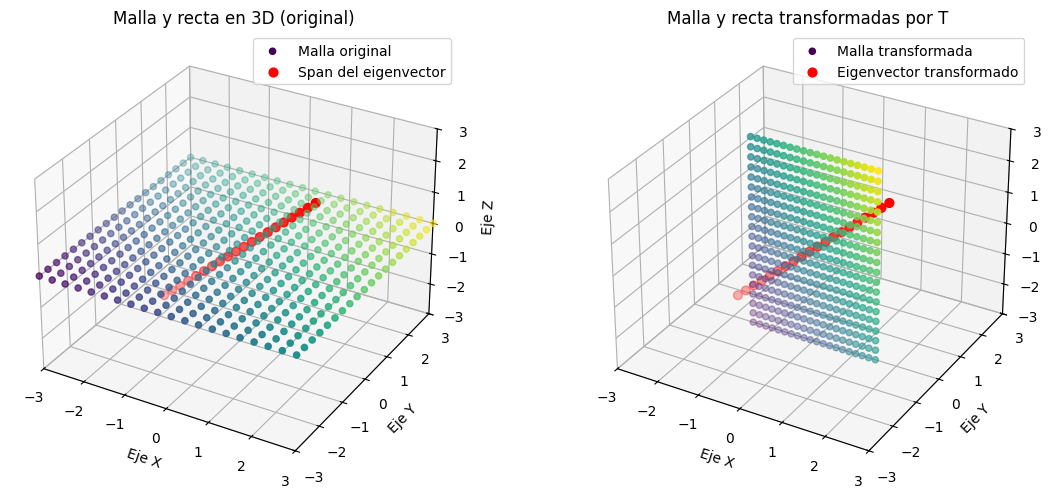

In [8]:
T = np.array([
    [0,   1/2, 1/2],
    [0,   0,   1  ],
    [1,   0,   0  ]
])

eigvals, eigvecs = np.linalg.eig(T)
idx = np.where(np.isclose(eigvals, 1))[0][0]
v = eigvecs[:, idx].real

# MALLA DE PUNTOS Z=0
n = 20
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)


mesh_points = np.vstack([X.ravel(), Y.ravel(), Z.ravel()])
colors = (X + Y).ravel()

# SPAN DEL EIGENVALUE
t_vals = np.linspace(-2, 2, n)
line_points = np.outer(v, t_vals)

# APLICAR TRANSFORMACIÓN LINEAL
mesh_points_T = T @ mesh_points
line_points_T = T @ line_points

fig = plt.figure(figsize=(12, 5))

# PLOTEAR PUNTOS
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
sc1 = ax1.scatter(
    mesh_points[0], mesh_points[1], mesh_points[2],
    c=colors, cmap='viridis', marker='o', label='Malla original'
)
ax1.scatter(
    line_points[0], line_points[1], line_points[2],
    color='red', s=40, label='Span del eigenvector'
)
ax1.set_title("Malla y recta en 3D (original)")
ax1.set_xlabel("Eje X")
ax1.set_ylabel("Eje Y")
ax1.set_zlabel("Eje Z")
ax1.legend()
ax1.set_xlim(-3, 3)
ax1.set_ylim(-3, 3)
ax1.set_zlim(-3, 3)

# PLOTEAR TRANSFORMACIONES
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
sc2 = ax2.scatter(
    mesh_points_T[0], mesh_points_T[1], mesh_points_T[2],
    c=colors, cmap='viridis', marker='o', label='Malla transformada'
)
ax2.scatter(
    line_points_T[0], line_points_T[1], line_points_T[2],
    color='red', s=40, label='Eigenvector transformado'
)
ax2.set_title("Malla y recta transformadas por T")
ax2.set_xlabel("Eje X")
ax2.set_ylabel("Eje Y")
ax2.set_zlabel("Eje Z")
ax2.legend()

ax2.set_xlim(-3, 3)
ax2.set_ylim(-3, 3)
ax2.set_zlim(-3, 3)

plt.tight_layout()
plt.show()
